0.3.0


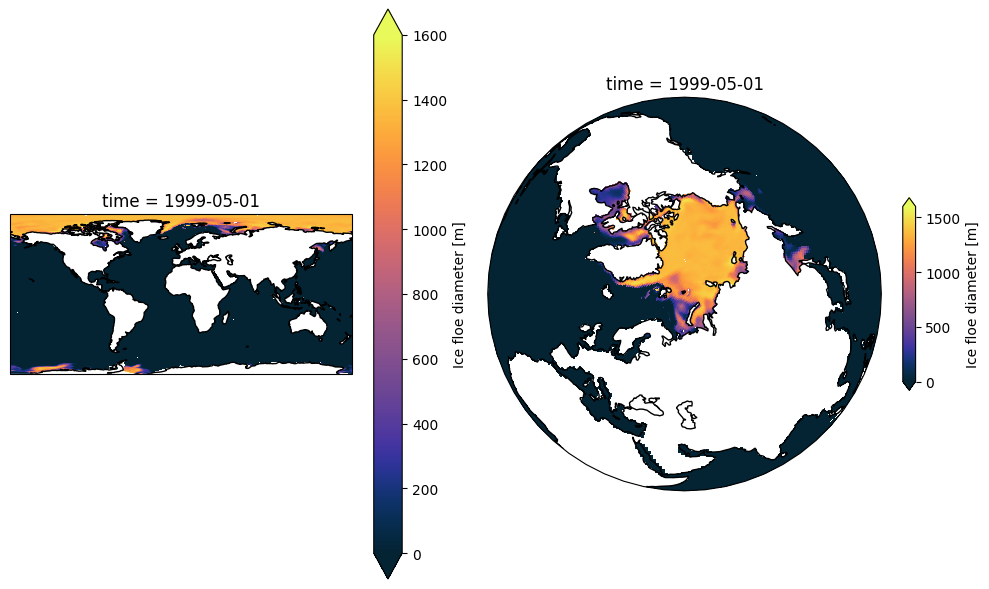

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cosima_cookbook as cc


ds2 = xr.open_dataset("/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_random_with_IS2BREAK/GMOM_JRA_WD.ww3.hi.1999-05-01-00000.nc")
ds1 = xr.open_dataset("/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_random_wave_type/GMOM_JRA_WD.ww3.hi.1999-05-01-00000.nc")

HS = ds1["ICEF"].isel(time=0).sortby(["ny","nx"]).assign_coords(
    {"geolon": ds1["lon"], "geolat": ds1["lat"]}
)

# Assuming `HS` and `ds1` are already defined

# Extract date from datetime variable in ds1
date = ds1["time"].isel(time=0).dt.strftime("%Y-%m-%d").item()

# Plotting Ice Floe Diameter in Plate Carree Projection
plt.figure(figsize=(10, 6))

# Subplot 1: Plate Carree Projection
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
HS.plot.pcolormesh(
    ax=ax1,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    vmin=0, vmax=1600, extend='both',
    cmap=cm.cm.thermal)
ax1.coastlines()

# Subplot 2: Orthographic Projection
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
HS.plot.pcolormesh(
    ax=ax2,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    vmin=0, vmax=1600, extend='both',
    cmap=cm.cm.thermal, 
    cbar_kwargs={
        'label': 'Ice floe diameter [m]',
        'fraction': 0.03,
        'aspect': 15,
        'shrink': 0.7
    }
)
ax2.coastlines()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig("/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_none_wave_type/Ice_floe_diam_combined.png", dpi=300)

# Show the plot
plt.show()


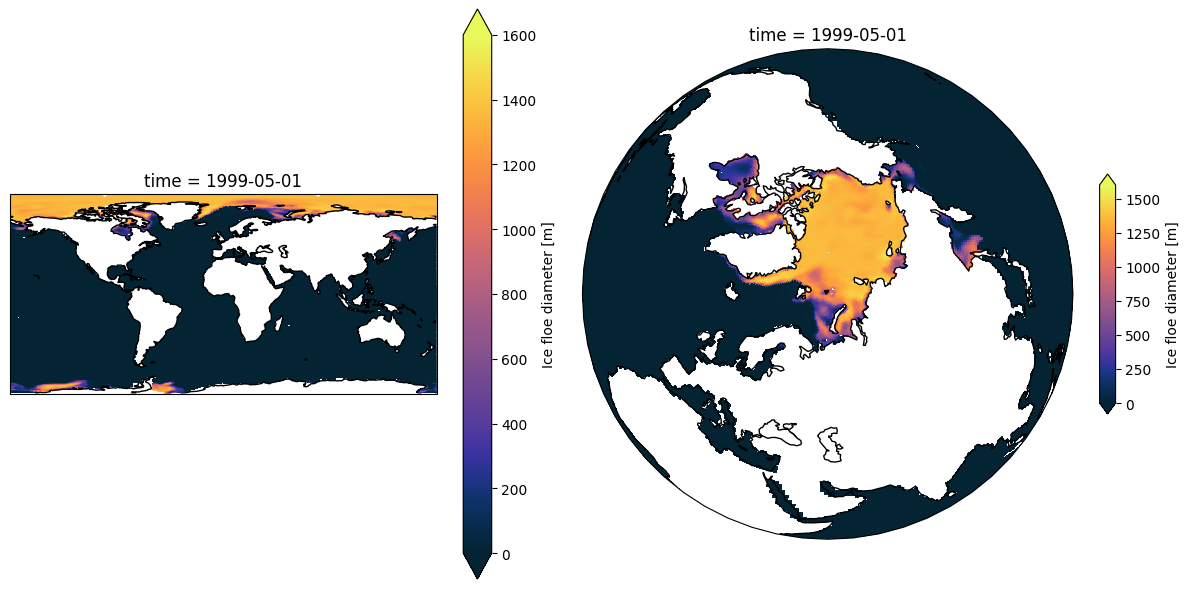

In [2]:

HS = ds2["ICEF"].isel(time=0).sortby(["ny","nx"]).assign_coords(
    {"geolon": ds2["lon"], "geolat": ds2["lat"]}
)

# Assuming `HS` and `ds1` are already defined

# Extract date from datetime variable in ds1
date = ds2["time"].isel(time=0).dt.strftime("%Y-%m-%d").item()

# Plotting Ice Floe Diameter in Plate Carree Projection
plt.figure(figsize=(12, 6))

# Subplot 1: Plate Carree Projection
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
HS.plot.pcolormesh(
    ax=ax1,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    vmin=0, vmax=1600, extend='both',
    cmap=cm.cm.thermal)
ax1.coastlines()

# Subplot 2: Orthographic Projection
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
HS.plot.pcolormesh(
    ax=ax2,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    vmin=0, vmax=1600, extend='both',
    cmap=cm.cm.thermal, 
    cbar_kwargs={
        'label': 'Ice floe diameter [m]',
        'fraction': 0.03,
        'aspect': 15,
        'shrink': 0.7
    }
)
ax2.coastlines()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig("/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_random_wave_type/Ice_floe_diam_combined_random.png", dpi=300)

# Show the plot
plt.show()

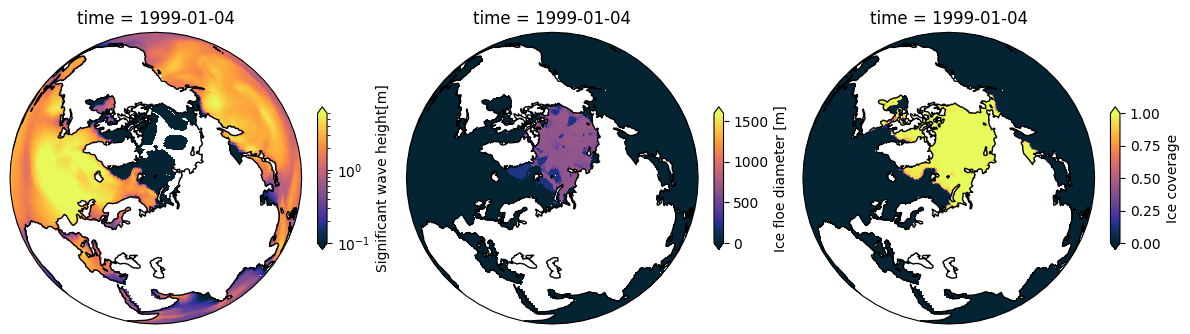

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cosima_cookbook as cc
from matplotlib.colors import LogNorm


ds2 = xr.open_dataset("/g/data/tm70/ek4684/MOM6-CICE6-WW3/work/GMOM_JRA_WD.ww3.hi.1999-01-04-00000.nc")
HS = ds2["HS"].isel(time=0).sortby(["ny","nx"]).assign_coords(
    {"geolon": ds2["lon"], "geolat": ds2["lat"]})

# Plotting Ice Floe Diameter in Plate Carree Projection
plt.figure(figsize=(12, 6))

# Subplot 1: Plate Carree Projection
ax1 = plt.subplot(1, 3, 1, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
HS.plot.pcolormesh(
    ax=ax1,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    vmin=0.1, vmax=6, extend='both',
    norm = LogNorm(),
    cmap=cm.cm.thermal,
    cbar_kwargs={
        'label': 'Significant wave height[m]',
        'fraction': 0.03,
        'aspect': 15,
        'shrink': 0.7})
ax1.coastlines()

ICEF = ds2["ICEF"].isel(time=0).sortby(["ny","nx"]).assign_coords(
    {"geolon": ds2["lon"], "geolat": ds2["lat"]})
# Subplot 2: Orthographic Projection
ax2 = plt.subplot(1, 3, 2, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
ICEF.plot.pcolormesh(
    ax=ax2,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    vmin=0, vmax=1600, extend='both',
    cmap=cm.cm.thermal, 
    cbar_kwargs={
        'label': 'Ice floe diameter [m]',
        'fraction': 0.03,
        'aspect': 15,
        'shrink': 0.7
    }
)
ax2.coastlines()

ICEF = ds2["ICE"].isel(time=0).sortby(["ny","nx"]).assign_coords(
    {"geolon": ds2["lon"], "geolat": ds2["lat"]})
# Subplot 2: Orthographic Projection
ax3 = plt.subplot(1, 3, 3, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
ICEF.plot.pcolormesh(
    ax=ax3,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    extend='both',
    cmap=cm.cm.thermal, 
    cbar_kwargs={
        'label': 'Ice coverage',
        'fraction': 0.03,
        'aspect': 15,
        'shrink': 0.7
    }
)
ax3.coastlines()
# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig("/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_random_icefrac_test/Ice_floe_diam_combined_09.png", dpi=300)

# Show the plot
plt.show()

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cosima_cookbook as cc
from matplotlib.colors import LogNorm

# Set the initial month and day
current_month = 1
current_day = 1

for i in range(730): 
    # Check if the current day exceeds the days in the current month
    if current_day > calendar.monthrange(2000, current_month)[1]:
        # Move to the next month
        current_month += 1
        current_day = 1  # Reset the day to 1 for the new month
    file_date = f"2000-{current_month:02d}-{current_day:02d}-00000"
        
    ds2 = xr.open_dataset(f"/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC4M2/GMOM_JRA_WD.ww3.hi.{file_date}.nc")
    HS = ds2["HS"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    
    ICE = ds2["ICE"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
    {"geolon": ds2["lon"], "geolat": ds2["lat"]})

    plt.figure(figsize=(12, 6))

    ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    HS.plot.pcolormesh(
        ax=ax1,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        vmin=0.001, vmax=6, extend='both',
        cmap=cm.cm.thermal,
        norm = LogNorm(),
        cbar_kwargs={
            'label': 'Significant wave height[m]',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7})
    ax1.coastlines()

    # Overlay contour of sea ice concentration on the same plot
    ICE.plot.contour(
    ax=ax1,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    levels=[0.15],  # Contour level for sea ice concentration
    colors='green',  # Color of the contour lines
    linewidths=1.5)  # Width of the contour lines)

    ICEF = ds2["ICEF"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    ICEF.plot.pcolormesh(
        ax=ax2,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        cmap=cm.cm.thermal,
        vmin=10, vmax=1500, extend='both',
        cbar_kwargs={
            'label': 'Ice floe diameter [m]',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7
        }
    )
    ax2.coastlines()

    ICEF = ds2["ICE"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    ICEF.plot.pcolormesh(
        ax=ax3,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=1, extend='both',
        cmap=cm.cm.thermal,
        cbar_kwargs={
            'label': 'Ice coverage',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7
        })
    ax3.coastlines()

    ICEF = ds2["ICEH"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    ax3 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    ICEF.plot.pcolormesh(
        ax=ax3,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=3, extend='both',
        cmap=cm.cm.thermal,
        cbar_kwargs={
            'label': 'Ice thickness [m]',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7
        }
    )
    ax3.coastlines()

    plt.tight_layout()
    plt.savefig(f"/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC4M2/Ice_floe_diam_combined_thick_{i+363:03d}.png", dpi=300)
    plt.show()
    plt.close()
    # Increment the day for the next iteration
    current_day += 1

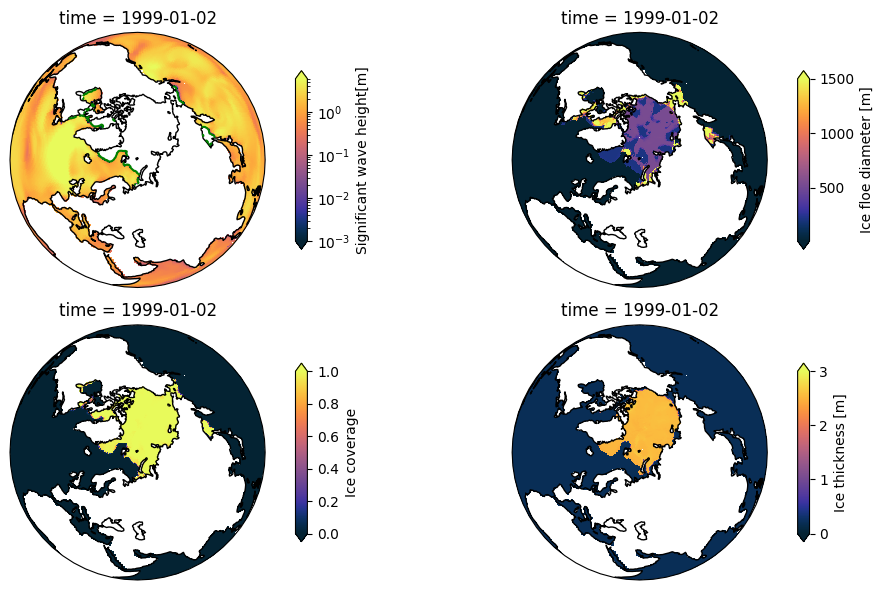

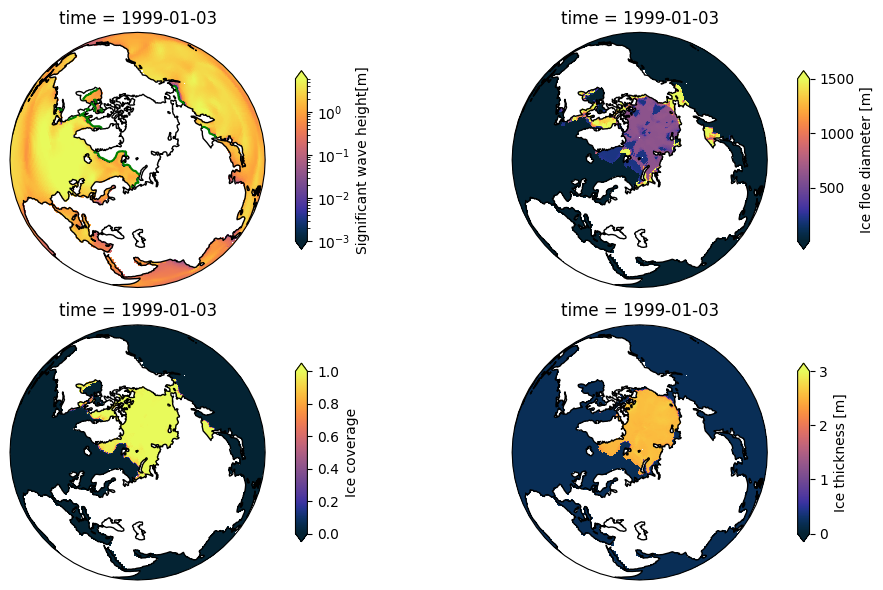

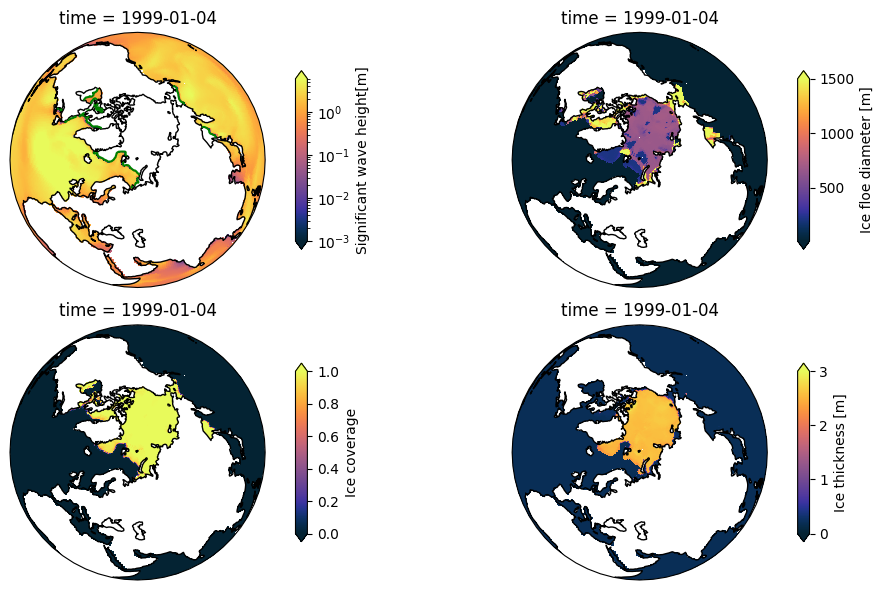

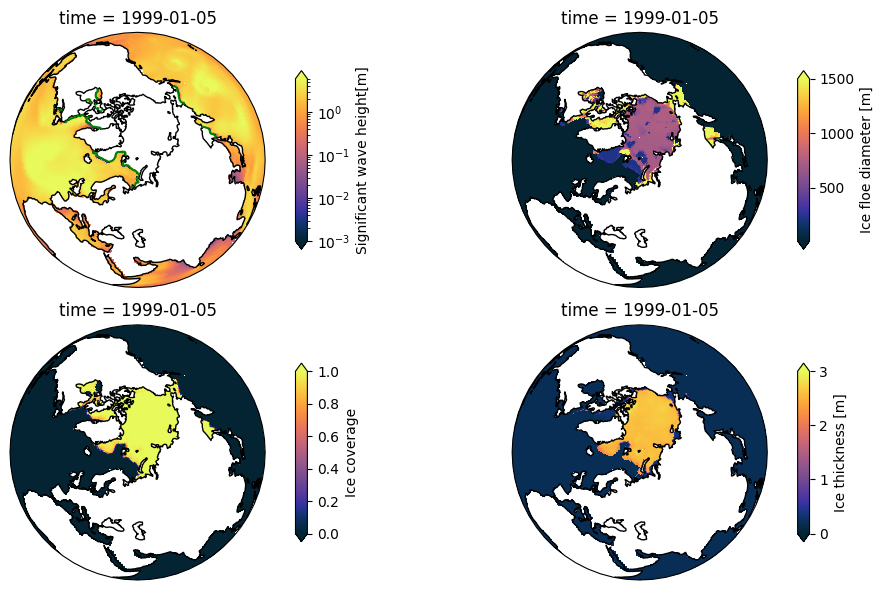

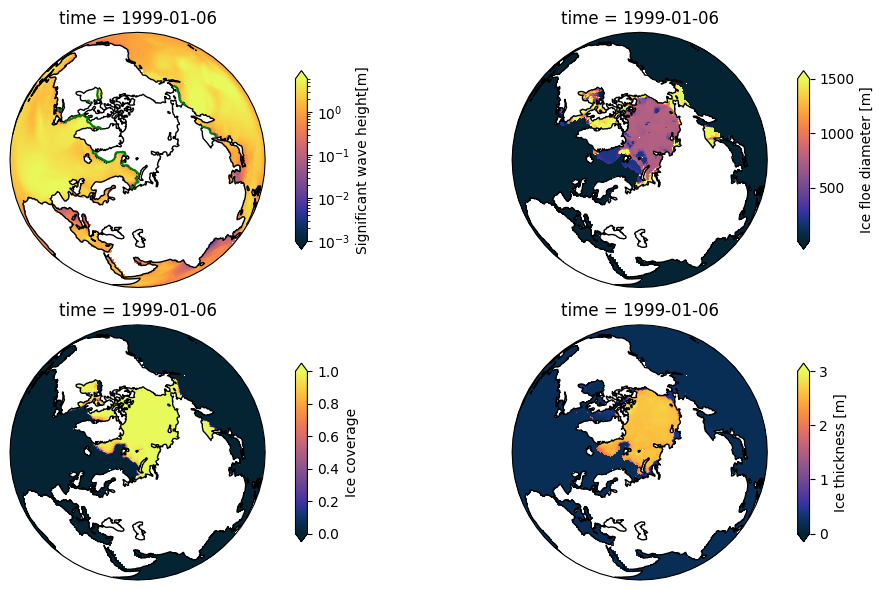

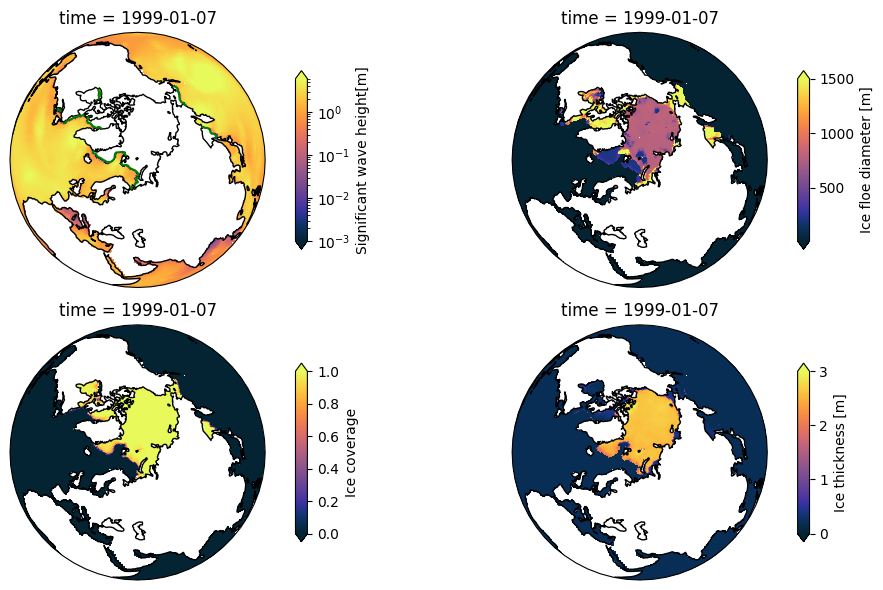

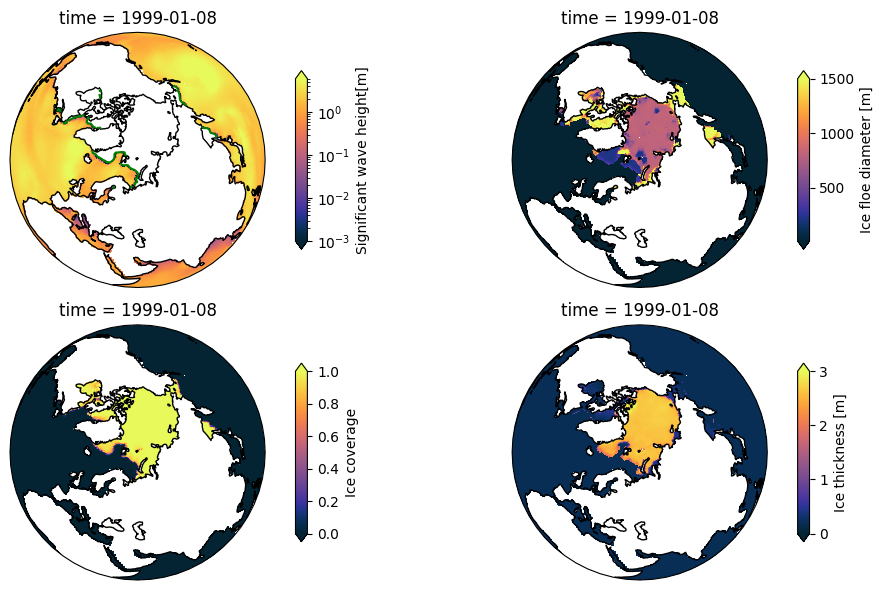

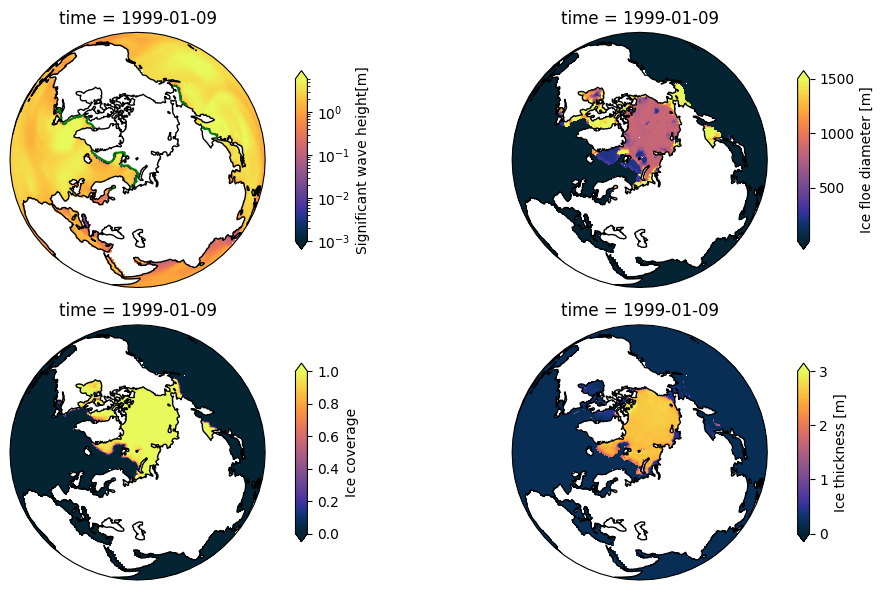

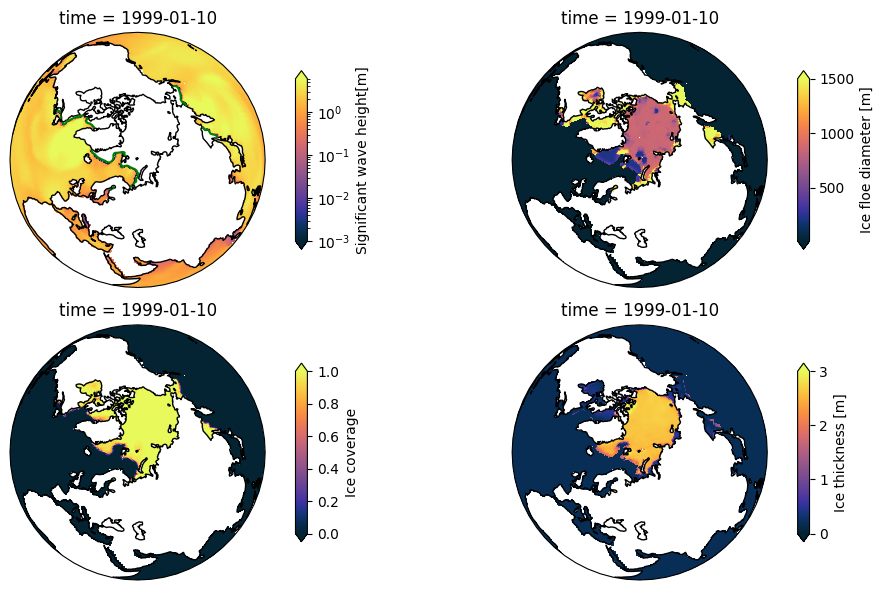

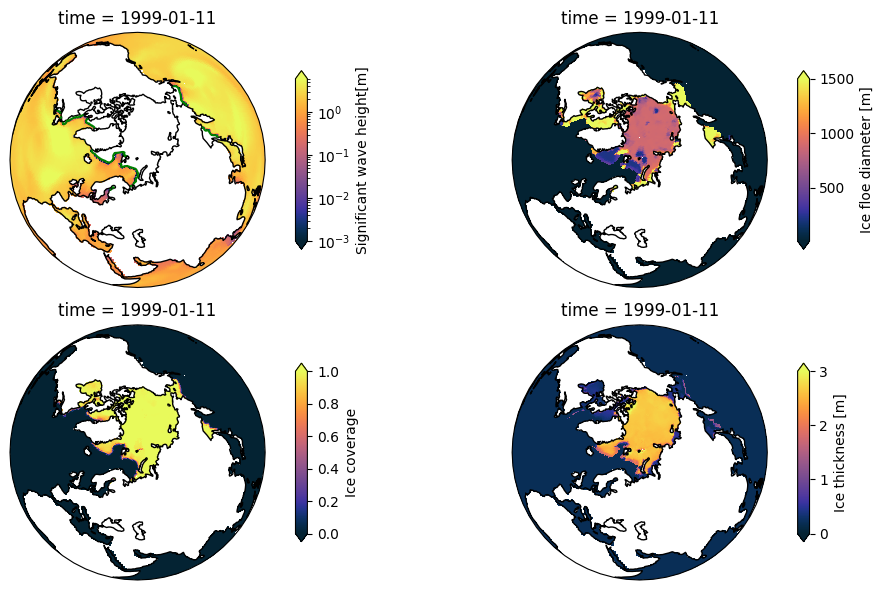

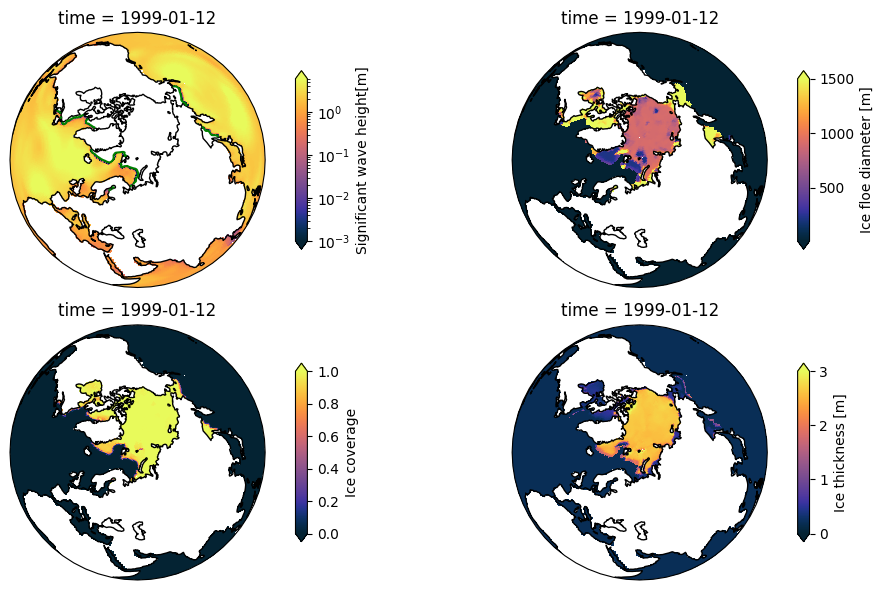

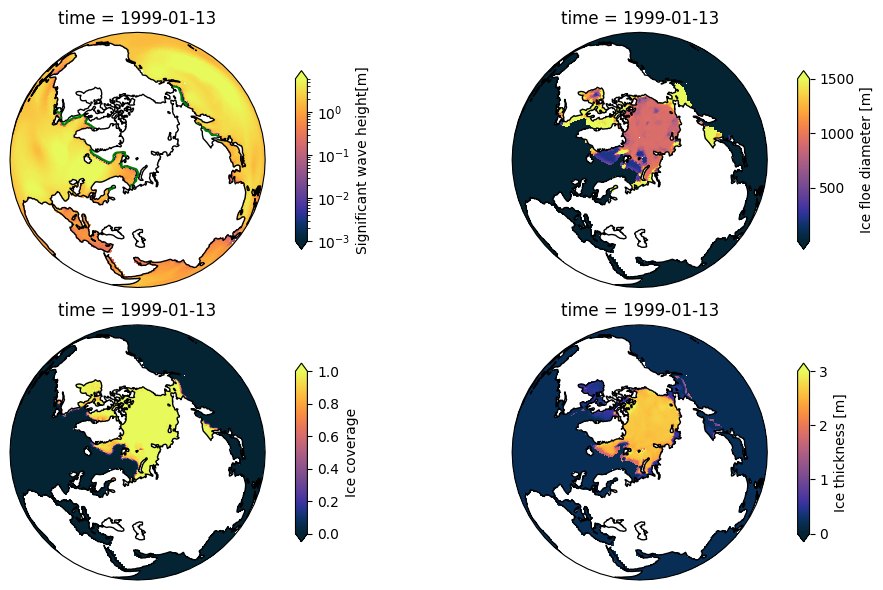

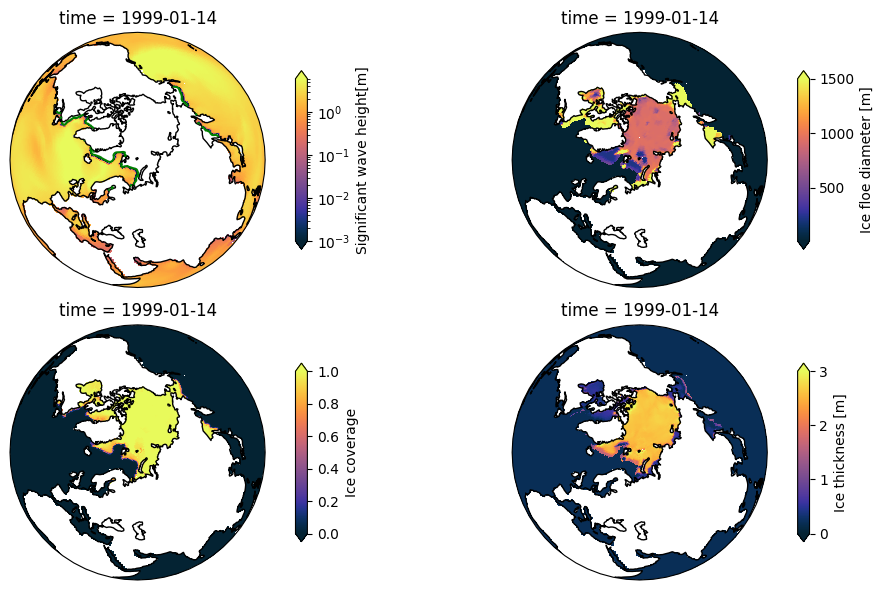

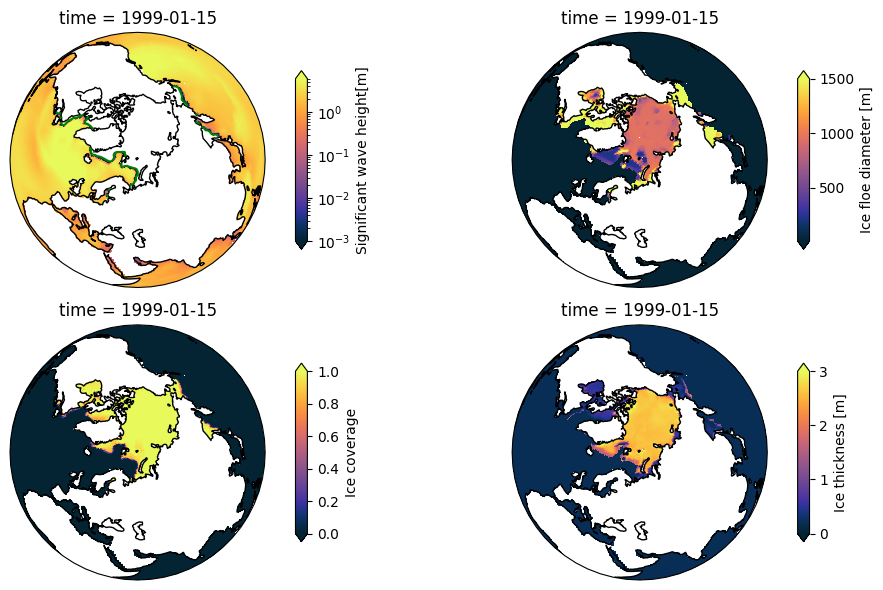

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import calendar
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cosima_cookbook as cc
from matplotlib.colors import LogNorm

# Set the initial month and day
current_month = 1
current_day = 2

for i in range(730): 
    # Check if the current day exceeds the days in the current month
    if current_day > calendar.monthrange(1999, current_month)[1]:
        # Move to the next month
        current_month += 1
        current_day = 1  # Reset the day to 1 for the new month
    file_date = f"1999-{current_month:02d}-{current_day:02d}-00000"
        
    ds2 = xr.open_dataset(f"/g/data/tm70/ek4684/MOM6-CICE6-WW3/work/GMOM_JRA_WD.ww3.hi.{file_date}.nc")
    HS = ds2["HS"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    
    ICE = ds2["ICE"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
    {"geolon": ds2["lon"], "geolat": ds2["lat"]})

    plt.figure(figsize=(12, 6))

    ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    HS.plot.pcolormesh(
        ax=ax1,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        vmin=0.001, vmax=6, extend='both',
        cmap=cm.cm.thermal,
        norm = LogNorm(),
        cbar_kwargs={
            'label': 'Significant wave height[m]',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7})
    ax1.coastlines()

    # Overlay contour of sea ice concentration on the same plot
    ICE.plot.contour(
    ax=ax1,
    x="geolon", y="geolat",
    transform=ccrs.PlateCarree(),
    levels=[0.15],  # Contour level for sea ice concentration
    colors='green',  # Color of the contour lines
    linewidths=1.5)  # Width of the contour lines)

    ICEF = ds2["ICEF"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    ICEF.plot.pcolormesh(
        ax=ax2,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        cmap=cm.cm.thermal,
        vmin=10, vmax=1500, extend='both',
        cbar_kwargs={
            'label': 'Ice floe diameter [m]',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7
        }
    )
    ax2.coastlines()

    ICEF = ds2["ICE"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    ICEF.plot.pcolormesh(
        ax=ax3,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=1, extend='both',
        cmap=cm.cm.thermal,
        cbar_kwargs={
            'label': 'Ice coverage',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7
        })
    ax3.coastlines()

    ICEF = ds2["ICEH"].isel(time=0).sortby(["ny", "nx"]).assign_coords(
        {"geolon": ds2["lon"], "geolat": ds2["lat"]})
    ax3 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(central_latitude=80, central_longitude=50))
    ICEF.plot.pcolormesh(
        ax=ax3,
        x="geolon", y="geolat",
        transform=ccrs.PlateCarree(),
        vmin=0, vmax=3, extend='both',
        cmap=cm.cm.thermal,
        cbar_kwargs={
            'label': 'Ice thickness [m]',
            'fraction': 0.03,
            'aspect': 15,
            'shrink': 0.7
        }
    )
    ax3.coastlines()

    plt.tight_layout()
    plt.savefig(f"/g/data/tm70/ek4684/MOM6-CICE6-WW3/Ice_floe_diam_combined_thick_{i+363:03d}.png", dpi=300)
    plt.show()
    plt.close()
    # Increment the day for the next iteration
    current_day += 1

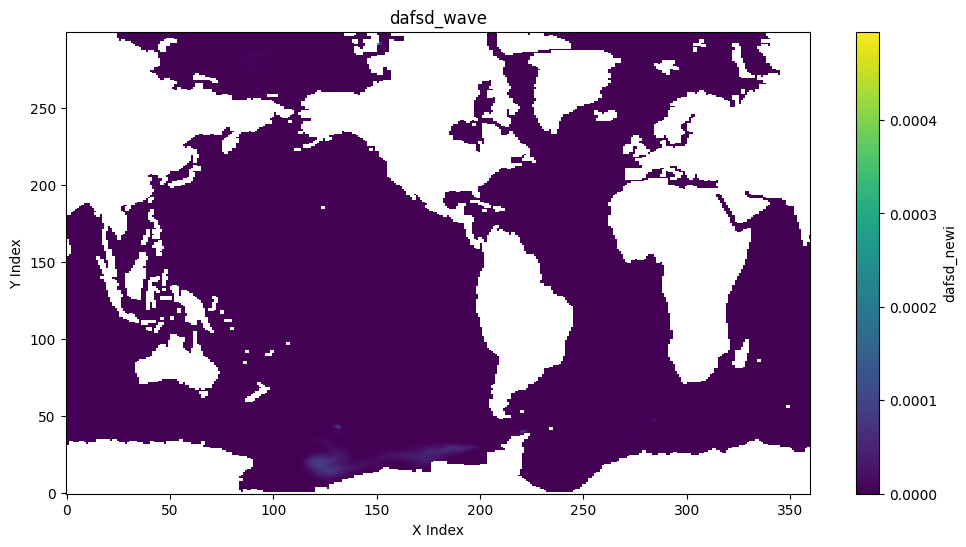

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ds2 = xr.open_dataset(f"/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC4M2/GMOM_JRA_WD.cice.h.2000-09.nc")
dafsd = ds2["afsd"].isel(time=0,nf=2).sortby(["nj", "ni"]).assign_coords(
        {"geolon": ds2["ULON"], "geolat": ds2["ULAT"]})
 
# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(dafsd[:, :], origin='lower', aspect='auto')
plt.colorbar(label='dafsd_newi')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.title(f'dafsd_wave')
plt.show()